<a href="https://colab.research.google.com/github/Het3375/MACHINE-LEARNING-PROJECT/blob/main/hosp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [214]:
HOSP=pd.read_csv('insurance.csv')
HOSP.head()
HOSP_NUM=HOSP.drop(["smoker","sex","region"],axis=1)
HOSP_CATEGO=HOSP[["smoker","sex","region"]].copy()

In [215]:
dataMapping={
    "southwest":4,
    "southeast":3,
    "northwest":2,
    "northeast":1
}
dataMapping2={
    "male":0,
    "female":1
}
dataMapping3={
    "yes":1,
    "no":0
}


In [216]:
HOSP_CATEGO['regions']=HOSP_CATEGO['region'].map(dataMapping)
HOSP_CATEGO['gender']=HOSP_CATEGO['sex'].map(dataMapping2)
HOSP_CATEGO['smokers']=HOSP_CATEGO['smoker'].map(dataMapping3)



In [217]:
HOSP_CATEGO_NUM=HOSP_CATEGO.drop(["smoker","sex","region"],axis=1)

In [218]:
HOSP_CATEGO_NUM

,regions,gender,smokers
0,4,1,1
1,3,0,0
2,3,0,0
3,2,0,0
4,2,0,0
...,...,...,...
1333,2,0,0
1334,1,1,0
1335,3,1,0
1336,4,1,0


In [219]:
final_stap=pd.concat([HOSP_NUM,HOSP_CATEGO_NUM], axis=1)

In [220]:
final_stap

,age,bmi,children,charges,regions,gender,smokers
0,19,27.900,0,16884.92400,4,1,1
1,18,33.770,1,1725.55230,3,0,0
2,28,33.000,3,4449.46200,3,0,0
3,33,22.705,0,21984.47061,2,0,0
4,32,28.880,0,3866.85520,2,0,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,2,0,0
1334,18,31.920,0,2205.98080,1,1,0
1335,18,36.850,0,1629.83350,3,1,0
1336,21,25.800,0,2007.94500,4,1,0


In [221]:
corr_matrix=final_stap.corr()
corr_matrix['charges'].sort_values(ascending=False)

charges     1.000000
smokers     0.787251
age         0.299008
bmi         0.198341
children    0.067998
regions    -0.006208
gender     -0.057292
Name: charges, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a96d92310>,
      dtype=object)

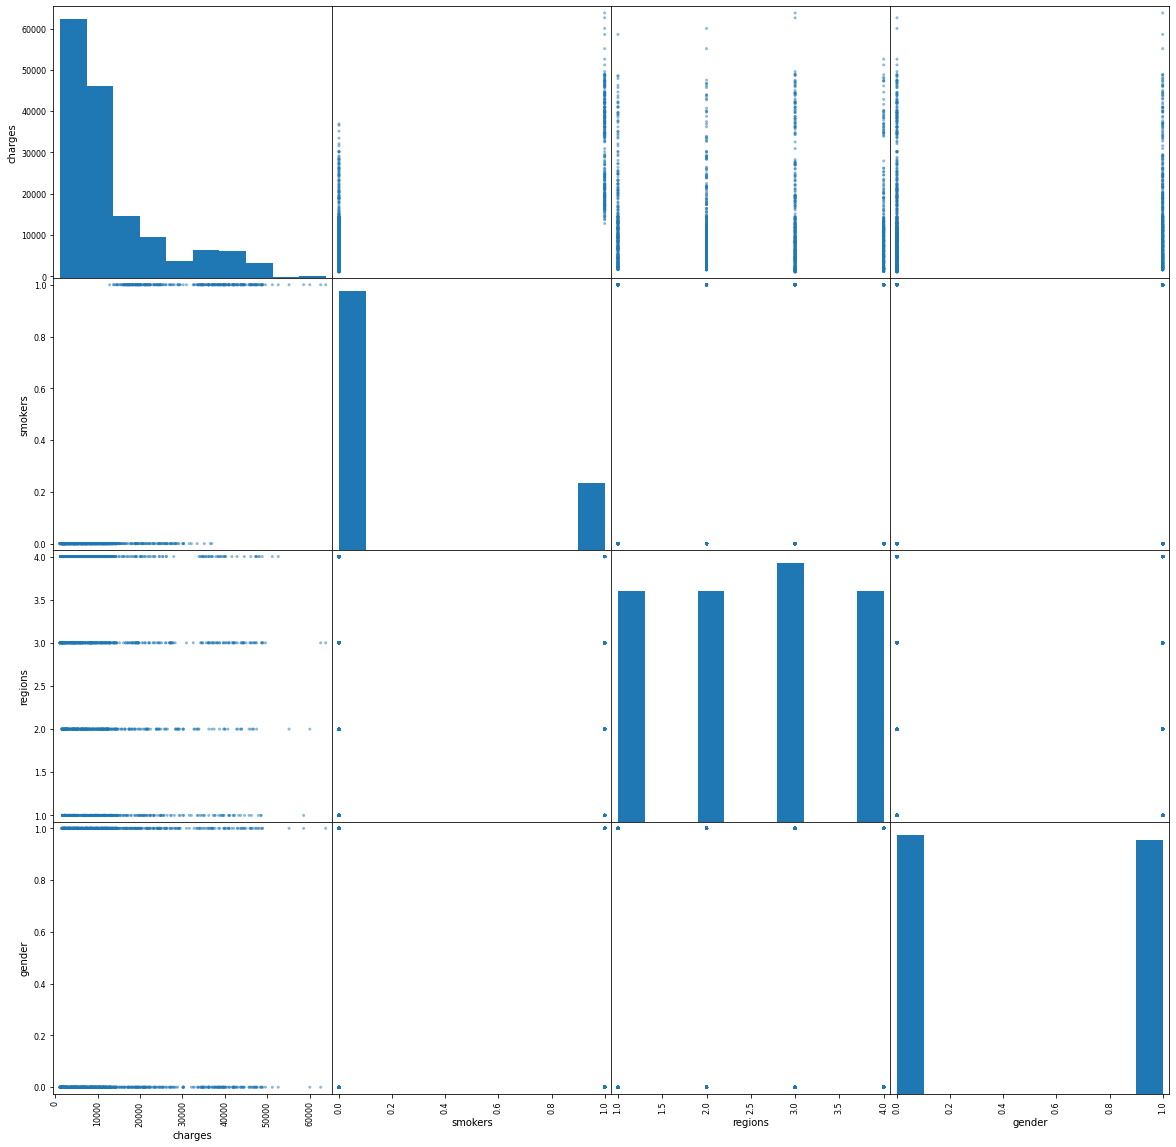

In [222]:
from pandas.plotting import scatter_matrix
features = ['charges', 'smokers', 'regions','gender']
scatter_matrix(final_stap[features],figsize=(20,20))

# Traing-Testing-spliting

In [223]:
from sklearn.model_selection import train_test_split
start_train_set,start_test_set=train_test_split(final_stap, test_size=0.2, random_state=42)

In [224]:
start_train_set.shape

(1070, 7)

In [225]:
start_test_set.shape

(268, 7)

In [226]:
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for train_index, test_index in rs.split(final_stap,final_stap['smokers']):
  start_train_index=final_stap.loc[train_index]
  start_test_index=final_stap.loc[test_index]

In [227]:
final_stap=start_train_index.drop("charges",axis=1)

final_labls=start_train_index["charges"].copy()

#Pipeline

In [228]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
pipe=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])
final_tr=pipe.fit_transform(final_stap)
final_tr

array([[-0.29168799, -1.18222906,  0.74574866, -1.39210742,  1.0226872 ,
        -0.49707771],
       [-1.43834663,  1.46518467, -0.08718565, -0.48494851,  1.0226872 ,
        -0.49707771],
       [ 0.138309  ,  1.57091729, -0.92011995,  0.42221041, -0.97781609,
        -0.49707771],
       ...,
       [ 1.14163531,  1.0529094 , -0.92011995,  1.32936933,  1.0226872 ,
        -0.49707771],
       [-1.51001279,  0.52506592, -0.92011995,  0.42221041,  1.0226872 ,
        -0.49707771],
       [-0.93668347, -0.19621088, -0.08718565,  0.42221041,  1.0226872 ,
        -0.49707771]])

# Prediction

In [229]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn import linear_model
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
model=RandomForestRegressor()
# model=LinearRegression()
# model=DecisionTreeRegressor()




model.fit(final_tr,final_labls)

RandomForestRegressor()

In [230]:
some_data=final_stap.iloc[:5]

In [231]:
some_labels=final_labls.iloc[:5]

In [232]:
prepared_data=pipe.transform(some_data)

In [233]:
model.predict(prepared_data)

array([ 7955.9001955,  5045.2486867,  5878.0157883, 13755.9019815,
        2088.0636711])

In [234]:
list(some_labels)


[6402.29135, 2730.10785, 5709.1644, 13844.7972, 1906.35825]

In [235]:
from sklearn.metrics import mean_squared_error
final_prediciton=model.predict(final_tr)
mean_value=mean_squared_error(final_labls,final_prediciton)
rmse=np.sqrt(mean_value)

In [236]:
rmse

1981.8826032665143

Cross-validations

In [237]:
from sklearn import linear_model
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,final_tr,final_labls,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [238]:
rmse_scores

array([5136.28792014, 5858.09653613, 5437.69050863, 3901.35450458,
       5268.74297278, 4885.03544613, 5544.42997054, 5261.99539235,
       5738.65096316, 3882.01490127])

In [239]:
def print_scores(scores):
  print("Scores",scores)
  print("Mean",scores.mean())
  print("Standered deviations",scores.std())

In [240]:
print_scores(rmse_scores)

Scores [5136.28792014 5858.09653613 5437.69050863 3901.35450458 5268.74297278
 4885.03544613 5544.42997054 5261.99539235 5738.65096316 3882.01490127]
Mean 5091.429911570284
Standered deviations 656.9540181778237


In [241]:
X_test=start_test_index.drop("charges",axis=1)
Y_test=start_test_index["charges"].copy()
X_test_preapared=pipe.transform(X_test)
final_predecition=model.predict(X_test_preapared)
final_mse=mean_squared_error(Y_test,final_predecition)
final_rmse=np.sqrt(final_mse)

In [242]:
print(final_predecition,Y_test)

[21765.6566818   9386.3259488   4952.8513455  11151.6808574
 14993.5200703  22005.2316215  23861.21646    35864.8645668
 11046.55437535  3710.67169835  6889.3323711  16857.114574
 12019.7749331  17577.3327295  12044.3096294   2139.54003
  5333.6080548   5184.2499298   9709.502209    9167.3038425
  6477.304355    4291.2154995   6195.2012651   5059.6336767
 18411.7593746  14730.3454191  10589.9288287  41055.189365
  5330.1344083   3366.9860621  17492.231197   48572.5460829
  3525.15119683  1779.502967   41395.8833728  34591.7269046
  4895.5072339  13335.4477059   4653.9616049   6498.5472235
  2574.8797198   7030.7796283  23998.750555   25768.92354
 20135.108047   28704.1882     11923.1606429   6774.1371772
  2158.8037542   4759.757646   13345.7142576  10709.1755344
 49225.7261647   2471.3831905   2741.51293458  1715.113564
 20898.4728938   2526.9259528   7471.773813   12093.3910516
 25501.1873269  29732.2244303   2248.0271485  11069.2978533
 16005.7457488  19934.853777   42078.4358906   